In [12]:
import os
import numpy as np
import cv2

img_size=224 #imagnet VGG16 transfer learning model requires 224x224 3 channel images as input

dataset=[]

data_path="/Users/kumara/Desktop/all folders/machine learning /deep learning projects/supervised/UTKFace_Original"
img_names=os.listdir(data_path)

#this code is not necassary if we use the whole dataset for training.Here,we only use 100 out of 23708 images.So,it is needed to shuffle the data set and make the selected 100 images well diversed.
from random import shuffle
shuffle(img_names)


for img_name in img_names[:100]:#here we only use 100 images
    img_path=os.path.join(data_path,img_name)
    img=cv2.imread(img_path)
    
    try:
        #gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#we tried in first attempt but did not work
        resized=cv2.resize(img,(img_size,img_size))
        
        age=img_name.split("_")[0]#getting age from image names
        
        dataset.append([resized,age])
        
    except Exception as e:
        print(e)
        

In [13]:
print(len(dataset))

100


In [14]:
np.array(dataset).shape

/var/folders/73/273zv05d6rv0tlp3j02pwv380000gn/T/ipykernel_976/1704588510.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(dataset).shape


(100, 2)

26


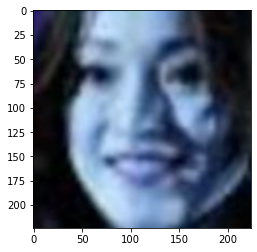

In [15]:
i=10
from matplotlib import pyplot as plt
plt.imshow(dataset[i][0])
print(dataset[i][1])

In [16]:
from random import shuffle
shuffle(dataset)

In [17]:
data=[]
target=[]
for feature,label in dataset:
    data.append(feature)
    target.append(label)
    

In [18]:
np.array(data).shape

(100, 224, 224, 3)

In [19]:
import numpy as np
new_data=np.array(data)/255.0#scaling

target=np.array(target)


from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

Init Plugin
Init Graph Optimizer
Init Kernel


In [20]:
new_data.shape

(100, 224, 224, 3)

In [21]:
new_target.shape

(100, 91)

In [22]:
new_data

array([[[[0.55686275, 0.54901961, 0.75294118],
         [0.56862745, 0.56078431, 0.76470588],
         [0.57647059, 0.56862745, 0.77254902],
         ...,
         [0.53333333, 0.50588235, 0.68627451],
         [0.51372549, 0.4745098 , 0.6627451 ],
         [0.48627451, 0.44313725, 0.63921569]],

        [[0.55294118, 0.54901961, 0.74509804],
         [0.56470588, 0.56078431, 0.75686275],
         [0.56470588, 0.56078431, 0.75686275],
         ...,
         [0.5254902 , 0.49803922, 0.67843137],
         [0.50980392, 0.47058824, 0.65490196],
         [0.48235294, 0.43921569, 0.63529412]],

        [[0.54901961, 0.54901961, 0.73333333],
         [0.55294118, 0.55294118, 0.7372549 ],
         [0.54901961, 0.54901961, 0.73333333],
         ...,
         [0.50980392, 0.48627451, 0.6627451 ],
         [0.50588235, 0.46666667, 0.65490196],
         [0.48627451, 0.44313725, 0.63921569]],

        ...,

        [[0.92941176, 0.8745098 , 0.89019608],
         [0.92941176, 0.8745098 , 0.89019608]

In [23]:
np.save("data_small_100",new_data)
np.save("target_small_100",new_target)